In [1]:
# Import all necessary library
import pandas as pd 
import numpy as np

# visualization library
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset

df = pd.read_csv(r'E:\Hochschule Ansbach\Thesis\DATA\df_LeadTime.csv')

In [3]:
# printing 1st 5 rows
df.head()

,Actual shipping days,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Department,Shipping Mode,Orders Date_datetype,Shipping date_datetype,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code
0,3,4,0,327.75,1,327.75,314.640015,327.75,Fitness,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,0,357,9539,1
1,5,4,1,327.75,1,327.75,311.359985,327.75,Fitness,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,0,357,7731,1
2,4,4,0,327.75,1,327.75,309.720001,327.75,Fitness,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,0,357,7731,1
3,3,4,0,327.75,1,327.75,304.809998,327.75,Fitness,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,2,357,10148,1
4,2,4,0,327.75,1,327.75,298.250000,327.75,Fitness,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,1,357,10148,1


# EDA

In [4]:
# describe method for numeric columns
df.describe()

,Actual shipping days,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,0.548291,141.232550,2.127638,203.772096,183.107609,141.232550,0.660545,16311.775331,14231.371119,0.957046
std,1.623722,1.374449,0.497664,139.732492,1.453451,132.273077,120.043670,139.732492,0.762408,7112.004248,9431.443100,0.202754
min,0.000000,0.000000,0.000000,9.990000,1.000000,9.990000,7.490000,9.990000,0.000000,61.000000,553.000000,0.000000
25%,2.000000,2.000000,0.000000,50.000000,1.000000,119.980003,104.379997,50.000000,0.000000,12487.000000,7280.000000,1.000000
50%,3.000000,4.000000,1.000000,59.990002,1.000000,199.919998,163.990005,59.990002,0.000000,17325.000000,9792.000000,1.000000
75%,5.000000,4.000000,1.000000,199.990005,3.000000,299.950012,247.399994,199.990005,1.000000,22246.000000,27109.000000,1.000000
max,6.000000,4.000000,1.000000,1999.989990,5.000000,1999.989990,1939.989990,1999.989990,2.000000,24551.000000,28341.000000,1.000000


In [5]:
# describe for non numeric columns 
df.describe(exclude='number')

,Department,Shipping Mode,Orders Date_datetype,Shipping date_datetype
count,180519,180519,180519,180519
unique,11,4,65752,63701
top,Fan Shop,Standard Class,2017-01-08 12:58:00,2015-09-10 19:58:00
freq,66861,107752,5,10


In [6]:
# info method 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Actual shipping days      180519 non-null  int64  
 1   Estimated shipping days   180519 non-null  int64  
 2   Late_risk                 180519 non-null  int64  
 3   Order Item Product Price  180519 non-null  float64
 4   Quantity                  180519 non-null  int64  
 5   Sales                     180519 non-null  float64
 6   Order Item Total          180519 non-null  float64
 7   Product Price             180519 non-null  float64
 8   Department                180519 non-null  object 
 9   Shipping Mode             180519 non-null  object 
 10  Orders Date_datetype      180519 non-null  object 
 11  Shipping date_datetype    180519 non-null  object 
 12  Customer Segment cat      180519 non-null  int64  
 13  Category_map              180519 non-null  i

# Preprocessing 

In [7]:
# Dropping irrevant columns
df.drop(['Orders Date_datetype', 'Shipping date_datetype'], axis=1, inplace= True)

# I will also drop the Estimated Shipping columns 

In [8]:
# printing 1st 5 rows
df.head(10)

,Actual shipping days,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Department,Shipping Mode,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code
0,3,4,0,327.75,1,327.75,314.640015,327.75,Fitness,Standard Class,0,357,9539,1
1,5,4,1,327.75,1,327.75,311.359985,327.75,Fitness,Standard Class,0,357,7731,1
2,4,4,0,327.75,1,327.75,309.720001,327.75,Fitness,Standard Class,0,357,7731,1
3,3,4,0,327.75,1,327.75,304.809998,327.75,Fitness,Standard Class,2,357,10148,1
4,2,4,0,327.75,1,327.75,298.250000,327.75,Fitness,Standard Class,1,357,10148,1
5,6,4,0,327.75,1,327.75,294.980011,327.75,Fitness,Standard Class,0,357,10148,0
6,2,1,1,327.75,1,327.75,288.420013,327.75,Fitness,First Class,2,357,7280,1
7,2,1,1,327.75,1,327.75,285.140015,327.75,Fitness,First Class,1,357,7280,1
8,3,2,1,327.75,1,327.75,278.589996,327.75,Fitness,Second Class,1,357,7280,1
9,2,1,1,327.75,1,327.75,275.309998,327.75,Fitness,First Class,1,357,7280,1


# Visual EDA
pd.plotting.scatter_matrix(df,  figsize = [20, 20],s=0.5, marker = 'D')

plt.xticks(rotation=90)
plt.show()

# Encoding dummy variables

# Sanity Check

In [9]:
# Have to count is it right or not cause i drop the 1st one so i have to do calculate the number or column ok or not 

In [10]:
# unique values in 'Department' column
df.Department.unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
       'Health and Beauty '], dtype=object)

In [11]:
# unique values in 'Shipping Mode' column
df['Shipping Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [12]:
# Counting how many unique values in these two  columns 

from collections import  Counter

d=Counter(df.Department.unique()) # this give us a dictonary .so  extract the values of dict nad make a sum.


print('Total unique values in "Department" : ', sum(d.values()))



e=Counter(df['Shipping Mode'].unique()) # this give us a dictonary .so  extract the values of dict nad make a sum.


print('Total unique values in "Shipping Mode": ',sum(e.values()))

# as we make dummy variable so we add 11+4= 15 columns ad we drop 1st to net 13 cloumns we  added

#print('\nOriginal df shape: ', df.shape)

#print('Dummy var df shape: ',df_dum.shape)
# get_dummy() also drop by default 'Department','Shipping Mode' columns which we made dummy variavle

Total unique values in "Department" :  11
Total unique values in "Shipping Mode":  4


In [13]:
# Checking data types
df.dtypes

Actual shipping days          int64
Estimated shipping days       int64
Late_risk                     int64
Order Item Product Price    float64
Quantity                      int64
Sales                       float64
Order Item Total            float64
Product Price               float64
Department                   object
Shipping Mode                object
Customer Segment cat          int64
Category_map                  int64
Order Region_map              int64
Delivery Status_code          int64
dtype: object

# Train/test split

In [40]:
# Import necessary Library


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



In [15]:
# "Actual shipping days" is target/Predic column/ variable here


# https://datascience.stackexchange.com/questions/70272/discrete-values-as-target-variable
# https://www.springboard.com/blog/data-science/regression-vs-classification/

 

print(df["Actual shipping days"].unique()) # it has 7 discreat valuues are that valeus are integer 

print(df["Actual shipping days"].dtypes)

# it is a regression problem

[3 5 4 2 6 0 1]
int64


In [16]:
# separating the feature variable
X=df.drop("Actual shipping days", axis=1)

# separating the target variable

y=df["Actual shipping days"]

In [17]:
# printing the dimension of feature space
print(X.shape)

# printing the dimension of target space
print(y.shape)

(180519, 13)
(180519,)


In [18]:
# Set seed for reproducibility

SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    
                                                    test_size=0.3,
                                                    
                                                    random_state=SEED)

In [19]:
# printing dimension

print(' X_train dimension : ', X_train.shape)
print('\n X_test dimension : ',X_test.shape )


print('\n y_train dimension : ',y_train.shape )
print(' \n y_test dimension : ',   y_test.shape)

 X_train dimension :  (126363, 13)

 X_test dimension :  (54156, 13)

 y_train dimension :  (126363,)
 
 y_test dimension :  (54156,)


In [20]:
# printing X_train
X_train

,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Department,Shipping Mode,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code
174722,4,1,24.990000,4,99.959999,92.959999,24.990000,Fitness,Standard Class,0,343,28341,1
172881,2,0,129.990005,1,129.990005,122.839996,129.990005,Apparel,Second Class,0,22246,27109,1
93616,4,1,129.990005,1,129.990005,123.489998,129.990005,Apparel,Standard Class,0,22246,7731,1
165190,4,0,39.990002,5,199.949997,185.949997,39.990002,Golf,Standard Class,2,10984,959,1
168879,1,1,99.989998,5,499.950012,494.950012,99.989998,Footwear,First Class,2,12487,1677,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,1,1,199.990005,1,199.990005,169.990005,199.990005,Fan Shop,First Class,0,15540,3232,1
109259,4,0,59.990002,5,299.950012,269.959992,59.990002,Apparel,Standard Class,0,24551,28341,1
50057,2,0,59.990002,5,299.950012,290.950012,59.990002,Apparel,Second Class,1,24551,6915,1
5192,4,0,59.990002,3,179.970001,167.369995,59.990002,Apparel,Standard Class,1,24551,14935,1


In [21]:
# printing X_test
X_test

,Estimated shipping days,Late_risk,Order Item Product Price,Quantity,Sales,Order Item Total,Product Price,Department,Shipping Mode,Customer Segment cat,Category_map,Order Region_map,Delivery Status_code
101369,4,0,49.980000,4,199.919998,197.919998,49.980000,Fan Shop,Standard Class,0,19298,4045,1
3026,4,1,164.380005,1,164.380005,164.380005,164.380005,Discs Shop,Standard Class,2,483,27109,1
57549,4,1,59.990002,4,239.960007,226.759994,59.990002,Apparel,Standard Class,0,24551,6009,1
127144,4,1,129.990005,1,129.990005,103.989998,129.990005,Apparel,Standard Class,0,22246,14935,1
160375,4,0,39.750000,1,39.750000,37.560001,39.750000,Discs Shop,Standard Class,0,838,7280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151386,4,0,399.980011,1,399.980011,379.980011,399.980011,Fan Shop,Standard Class,1,17325,6915,1
9189,4,0,59.990002,5,299.950012,278.950012,59.990002,Apparel,Standard Class,0,24551,9539,1
83970,4,0,59.990002,1,59.990002,47.990002,59.990002,Apparel,Standard Class,0,24551,8318,1
122909,2,1,99.989998,3,299.970001,269.970001,99.989998,Footwear,Second Class,1,12487,27109,1


# One Hot Encoding 

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
# drop 1st dummy variable to avoid dummny variable trap

ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32) # then u do not need to use 'to_array()'

X_train_new= ohe.fit_transform(X_train[['Shipping Mode','Department']])

X_test_new= ohe.fit_transform(X_test[['Shipping Mode','Department']])

In [24]:
# have a look on X_train_new
X_train_new

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [25]:
# have a look on X_train_new
X_test_new

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [26]:
# dimension of X_train_new and X_test_new
print(' X_train_new dimension : ', X_train_new.shape)
print('\n X_test_new dimension : ',X_test_new.shape )

 X_train_new dimension :  (126363, 13)

 X_test_new dimension :  (54156, 13)


# Joining 

In [27]:
X_train.columns

Index(['Estimated shipping days', 'Late_risk', 'Order Item Product Price',
       'Quantity', 'Sales', 'Order Item Total', 'Product Price', 'Department',
       'Shipping Mode', 'Customer Segment cat', 'Category_map',
       'Order Region_map', 'Delivery Status_code'],
      dtype='object')

In [28]:
# join with others columns and One hot encoded columns
X_train=np.hstack((X_train[['Estimated shipping days', 'Late_risk', 'Order Item Product Price',
       'Quantity', 'Sales', 'Order Item Total', 'Product Price', 
        'Customer Segment cat', 'Category_map',
       'Order Region_map', 'Delivery Status_code']].values,X_train_new))

In [29]:
# Dimension of  X_train after joining 
X_train.shape

(126363, 24)

In [30]:
# join with others columns and One hot encoded columns
X_test=np.hstack((X_test[['Estimated shipping days', 'Late_risk', 'Order Item Product Price',
       'Quantity', 'Sales', 'Order Item Total', 'Product Price', 
        'Customer Segment cat', 'Category_map',
       'Order Region_map', 'Delivery Status_code']].values,X_test_new))

In [31]:
# Dimension of  X_test after joining 
X_test.shape

(54156, 24)

# Building Model 

In [47]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=24, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='relu'))


model.add(Dense(1, activation='linear'))# for  regression problem the output layer activation function in only 'linear''

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               3200      
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 8)                 264       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 7,601
Trainable params: 7,601
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model to the data
history =model.fit(X_train,  y_train, epochs=50, validation_split=0.2)

Epoch 1/50
3160/3160 [==============================] - 9s 3ms/step - loss: 1.6799 - accuracy: 0.0310 - val_loss: 1.4451 - val_accuracy: 0.0400
Epoch 2/50
3160/3160 [==============================] - 8s 2ms/step - loss: 1.4323 - accuracy: 0.0370 - val_loss: 1.9892 - val_accuracy: 0.0327
Epoch 3/50
3160/3160 [==============================] - 8s 2ms/step - loss: 1.3297 - accuracy: 0.0382 - val_loss: 1.6062 - val_accuracy: 0.0322
Epoch 4/50
3160/3160 [==============================] - 8s 3ms/step - loss: 1.1841 - accuracy: 0.0407 - val_loss: 1.4476 - val_accuracy: 0.0391
Epoch 5/50
3160/3160 [==============================] - 8s 2ms/step - loss: 1.0997 - accuracy: 0.0427 - val_loss: 2.0013 - val_accuracy: 0.0355
Epoch 6/50
3160/3160 [==============================] - 8s 3ms/step - loss: 1.0687 - accuracy: 0.0419 - val_loss: 3.1756 - val_accuracy: 0.0263
Epoch 7/50
3160/3160 [==============================] - 8s 3ms/step - loss: 1.0260 - accuracy: 0.0440 - val_loss: 1.8178 - val_accuracy:

In [57]:
# Prediction
y_pred= model.predict(X_test)

1693/1693 [==============================] - 3s 2ms/step


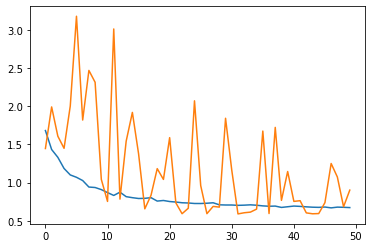

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

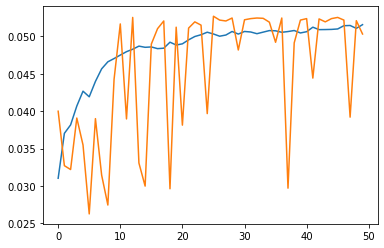

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Model Performance

In [58]:
# mean_absolute_error
## There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.7347329556559524


In [59]:
# There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.9139544839642538


In [60]:
# storing the r2 score  
r2 = r2_score(y_test,y_pred)
print(r2)

0.6536722263538179


In [55]:
# do direct function for RMSE so we use np.sqrt()
# when u have the outlier it is a better metrics 
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 1.6121591977793015


# Model 2

In [61]:
# Fit the model to the data
history2 =model.fit(X_train,  y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3160/3160 [==============================] - 8s 3ms/step - loss: 0.6792 - accuracy: 0.0515 - val_loss: 0.6709 - val_accuracy: 0.0518
Epoch 2/100
3160/3160 [==============================] - 8s 3ms/step - loss: 0.6622 - accuracy: 0.0517 - val_loss: 0.5954 - val_accuracy: 0.0525
Epoch 3/100
3160/3160 [==============================] - 8s 3ms/step - loss: 0.6701 - accuracy: 0.0517 - val_loss: 0.7664 - val_accuracy: 0.0520
Epoch 4/100
3160/3160 [==============================] - 8s 3ms/step - loss: 0.6642 - accuracy: 0.0515 - val_loss: 0.6136 - val_accuracy: 0.0523
Epoch 5/100
3160/3160 [==============================] - 8s 3ms/step - loss: 0.6548 - accuracy: 0.0517 - val_loss: 1.3439 - val_accuracy: 0.0462
Epoch 6/100
3160/3160 [==============================] - 8s 3ms/step - loss: 0.6675 - accuracy: 0.0518 - val_loss: 0.5778 - val_accuracy: 0.0527
Epoch 7/100
3160/3160 [==============================] - 8s 3ms/step - loss: 0.6593 - accuracy: 0.0518 - val_loss: 0.7691 - val_ac

3160/3160 [==============================] - 7s 2ms/step - loss: 0.6225 - accuracy: 0.0523 - val_loss: 0.6090 - val_accuracy: 0.0523
Epoch 58/100
3160/3160 [==============================] - 7s 2ms/step - loss: 0.6252 - accuracy: 0.0523 - val_loss: 0.7081 - val_accuracy: 0.0526
Epoch 59/100
3160/3160 [==============================] - 7s 2ms/step - loss: 0.6262 - accuracy: 0.0523 - val_loss: 0.6713 - val_accuracy: 0.0523
Epoch 60/100
3160/3160 [==============================] - 8s 2ms/step - loss: 0.6255 - accuracy: 0.0523 - val_loss: 0.5516 - val_accuracy: 0.0525
Epoch 61/100
3160/3160 [==============================] - 8s 2ms/step - loss: 0.6205 - accuracy: 0.0523 - val_loss: 0.6396 - val_accuracy: 0.0526
Epoch 62/100
3160/3160 [==============================] - 8s 3ms/step - loss: 0.6208 - accuracy: 0.0524 - val_loss: 0.5707 - val_accuracy: 0.0526
Epoch 63/100
3160/3160 [==============================] - 8s 2ms/step - loss: 0.6151 - accuracy: 0.0523 - val_loss: 0.5686 - val_accuracy

In [62]:
# Prediction
y_pred2= model.predict(X_test)

1693/1693 [==============================] - 2s 1ms/step


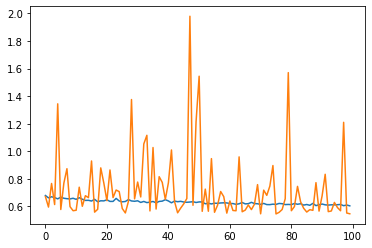

In [71]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

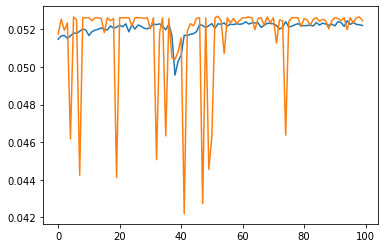

In [72]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

# Model Performance

In [63]:
# mean_absolute_error
## There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect
print("MAE",mean_absolute_error(y_test,y_pred2))

MAE 0.545190334008011


In [64]:
# There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.
print("MSE",mean_squared_error(y_test,y_pred2))

MSE 0.5509840654052717


In [65]:
# storing the r2 score  
r2 = r2_score(y_test,y_pred2)
print(r2)

0.7912137988987715


In [66]:
# do direct function for RMSE so we use np.sqrt()
# when u have the outlier it is a better metrics 
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred2)))

RMSE 0.7422830089698077


# Model 
# Early Stopping 
For using Early stoppin in Keras there is a features called CallBack it has many function , by using CAllBack after each epoch you can do something, there after each epoch we use eraly stopping to check modle performance

# callback

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001, # how much improvement you consider (diffrecen from previos to next ) 
    patience=20,
    verbose=1,
    mode="auto", # set it always auto . 
    baseline=None, # generaly we do not set it anythnng , None is the best 
    restore_best_weights=False
)

In [79]:
# same as previous only in the end we addee callbacks=callback
history3 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, callbacks=callback)

Epoch 1/300
3949/3949 [==============================] - 11s 3ms/step - loss: 0.6042 - accuracy: 0.0523 - val_loss: 0.5512 - val_accuracy: 0.0536
Epoch 2/300
3949/3949 [==============================] - 11s 3ms/step - loss: 0.6032 - accuracy: 0.0525 - val_loss: 0.6895 - val_accuracy: 0.0537
Epoch 3/300
3949/3949 [==============================] - 12s 3ms/step - loss: 0.6026 - accuracy: 0.0523 - val_loss: 0.5833 - val_accuracy: 0.0535
Epoch 4/300
3949/3949 [==============================] - 11s 3ms/step - loss: 0.6082 - accuracy: 0.0522 - val_loss: 0.5808 - val_accuracy: 0.0535
Epoch 5/300
3949/3949 [==============================] - 12s 3ms/step - loss: 0.5995 - accuracy: 0.0523 - val_loss: 0.6461 - val_accuracy: 0.0536
Epoch 6/300
3949/3949 [==============================] - 11s 3ms/step - loss: 0.5993 - accuracy: 0.0523 - val_loss: 0.6256 - val_accuracy: 0.0536
Epoch 7/300
3949/3949 [==============================] - 12s 3ms/step - loss: 0.6042 - accuracy: 0.0523 - val_loss: 0.5910 -

In [80]:
# Prediction
y_pred3= model.predict(X_test)

1693/1693 [==============================] - 3s 2ms/step


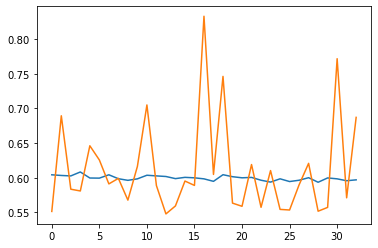

In [81]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

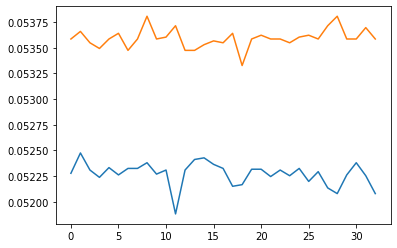

In [82]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

In [83]:
# Model Performance

# mean_absolute_error
## There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect
print("MAE",mean_absolute_error(y_test,y_pred3))

# There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.
print("MSE",mean_squared_error(y_test,y_pred3))

# storing the r2 score  
r2 = r2_score(y_test,y_pred3)
print(r2)

# do direct function for RMSE so we use np.sqrt()
# when u have the outlier it is a better metrics 
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred3)))

MAE 0.5965462069810141
MSE 0.6871646112058393
0.7396104575195994
RMSE 0.8289539258643024


# Model 4

In [84]:
# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=24, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1, activation='linear'))# for  regression problem the output layer activation function in only 'linear''

In [85]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               3200      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 14,209
Trainable params: 14,209
Non-trai

In [87]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [88]:
# same as previous only in the end we addee callbacks=callback
history4 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, callbacks=callback)

Epoch 1/300
3949/3949 [==============================] - 13s 3ms/step - loss: 1559.5341 - accuracy: 0.0257 - val_loss: 2.6408 - val_accuracy: 0.0263
Epoch 2/300
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6362 - accuracy: 0.0256 - val_loss: 2.6412 - val_accuracy: 0.0263
Epoch 3/300
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6361 - accuracy: 0.0256 - val_loss: 2.6390 - val_accuracy: 0.0263
Epoch 4/300
3949/3949 [==============================] - 12s 3ms/step - loss: 3.3799 - accuracy: 0.0256 - val_loss: 2.6391 - val_accuracy: 0.0263
Epoch 5/300
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6358 - accuracy: 0.0256 - val_loss: 2.6399 - val_accuracy: 0.0263
Epoch 6/300
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6360 - accuracy: 0.0256 - val_loss: 2.6390 - val_accuracy: 0.0263
Epoch 7/300
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6363 - accuracy: 0.0256 - val_loss: 2.639

In [89]:
# Prediction
y_pred4= model.predict(X_test)

1693/1693 [==============================] - 3s 1ms/step


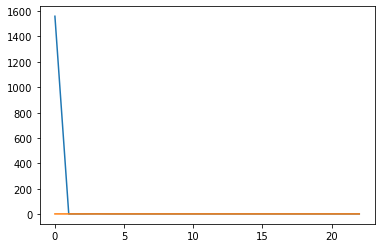

In [90]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

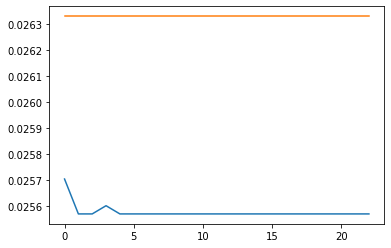

In [95]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])

In [93]:
# Model Performance

# mean_absolute_error
## There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect
print("MAE",mean_absolute_error(y_test,y_pred4))

# There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.
print("MSE",mean_squared_error(y_test,y_pred4))

# storing the r2 score  
r2 = r2_score(y_test,y_pred4)
print("R2",r2)

# do direct function for RMSE so we use np.sqrt()
# when u have the outlier it is a better metrics 
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred4)))

MAE 1.4243444098759916
MSE 2.639018463027114
R2 -1.1931608506987601e-05
RMSE 1.6245056057235119


# Model 5

In [96]:
# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=24, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1, activation='linear'))# for  regression problem the output layer activation function in only 'linear''

In [97]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               3200      
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 1)                 9         
                                                                 
Total params: 14,209
Trainable params: 14,209
Non-trai

In [98]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [99]:
# same as previous only in the end we addee callbacks=callback
history5 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
3949/3949 [==============================] - 14s 3ms/step - loss: 558.4117 - accuracy: 0.0260 - val_loss: 3.6024 - val_accuracy: 0.0263
Epoch 2/200
3949/3949 [==============================] - 12s 3ms/step - loss: 6.2717 - accuracy: 0.0260 - val_loss: 3.3698 - val_accuracy: 0.0263
Epoch 3/200
3949/3949 [==============================] - 12s 3ms/step - loss: 3.6197 - accuracy: 0.0256 - val_loss: 2.8275 - val_accuracy: 0.0263
Epoch 4/200
3949/3949 [==============================] - 12s 3ms/step - loss: 6.5118 - accuracy: 0.0256 - val_loss: 2.7864 - val_accuracy: 0.0263
Epoch 5/200
3949/3949 [==============================] - 12s 3ms/step - loss: 4.3702 - accuracy: 0.0255 - val_loss: 2.6982 - val_accuracy: 0.0263
Epoch 6/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.7164 - accuracy: 0.0256 - val_loss: 2.6394 - val_accuracy: 0.0263
Epoch 7/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6358 - accuracy: 0.0256 - val_loss: 2.6393

Epoch 57/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6364 - accuracy: 0.0256 - val_loss: 2.6410 - val_accuracy: 0.0263
Epoch 58/200
3949/3949 [==============================] - 13s 3ms/step - loss: 2.6364 - accuracy: 0.0256 - val_loss: 2.6393 - val_accuracy: 0.0263
Epoch 59/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6364 - accuracy: 0.0256 - val_loss: 2.6412 - val_accuracy: 0.0263
Epoch 60/200
3949/3949 [==============================] - 11s 3ms/step - loss: 2.6363 - accuracy: 0.0256 - val_loss: 2.6390 - val_accuracy: 0.0263
Epoch 61/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6365 - accuracy: 0.0256 - val_loss: 2.6395 - val_accuracy: 0.0263
Epoch 62/200
3949/3949 [==============================] - 11s 3ms/step - loss: 2.6362 - accuracy: 0.0256 - val_loss: 2.6407 - val_accuracy: 0.0263
Epoch 63/200
3949/3949 [==============================] - 11s 3ms/step - loss: 2.6364 - accuracy: 0.0256 - val_loss: 2

3949/3949 [==============================] - 12s 3ms/step - loss: 2.6363 - accuracy: 0.0256 - val_loss: 2.6392 - val_accuracy: 0.0263
Epoch 113/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6365 - accuracy: 0.0256 - val_loss: 2.6394 - val_accuracy: 0.0263
Epoch 114/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6362 - accuracy: 0.0256 - val_loss: 2.6390 - val_accuracy: 0.0263
Epoch 115/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6359 - accuracy: 0.0256 - val_loss: 2.6442 - val_accuracy: 0.0263
Epoch 116/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6362 - accuracy: 0.0256 - val_loss: 2.6399 - val_accuracy: 0.0263
Epoch 117/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6361 - accuracy: 0.0256 - val_loss: 2.6398 - val_accuracy: 0.0263
Epoch 118/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6364 - accuracy: 0.0256 - val_loss: 2.6444 -

3949/3949 [==============================] - 12s 3ms/step - loss: 2.6362 - accuracy: 0.0256 - val_loss: 2.6390 - val_accuracy: 0.0263
Epoch 168/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6363 - accuracy: 0.0256 - val_loss: 2.6403 - val_accuracy: 0.0263
Epoch 169/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6362 - accuracy: 0.0256 - val_loss: 2.6392 - val_accuracy: 0.0263
Epoch 170/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6360 - accuracy: 0.0256 - val_loss: 2.6401 - val_accuracy: 0.0263
Epoch 171/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6361 - accuracy: 0.0256 - val_loss: 2.6394 - val_accuracy: 0.0263
Epoch 172/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6360 - accuracy: 0.0256 - val_loss: 2.6390 - val_accuracy: 0.0263
Epoch 173/200
3949/3949 [==============================] - 12s 3ms/step - loss: 2.6362 - accuracy: 0.0256 - val_loss: 2.6390 -

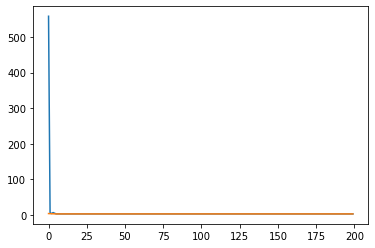

In [100]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])

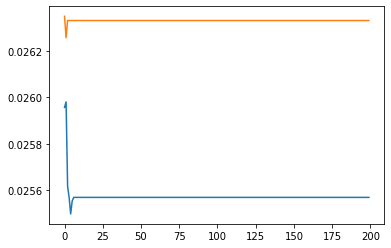

In [101]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])

In [103]:
# Prediction
y_pred5= model.predict(X_test)

1693/1693 [==============================] - 3s 2ms/step


In [104]:
# Model Performance

# mean_absolute_error
## There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect
print("MAE",mean_absolute_error(y_test,y_pred5))

# There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.
print("MSE",mean_squared_error(y_test,y_pred5))

# storing the r2 score  
r2 = r2_score(y_test,y_pred5)
print("R2",r2)

# do direct function for RMSE so we use np.sqrt()
# when u have the outlier it is a better metrics 
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred5)))

MAE 1.4229267370983474
MSE 2.639511775451963
R2 -0.00019886410548308753
RMSE 1.6246574332615362
